In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import pickle
from mpl_toolkits.axes_grid1 import make_axes_locatable
import sys
import matplotlib as mpl
from scipy.interpolate import griddata 
import warnings
import os
import numpy as np
sys.path.append('C:/Users/shjo/Bridge/JNUpack/mySO_src/libs/')
warnings.filterwarnings('ignore')
from myTools import myInfo
from myTrend import myfitting2d_sttcs,myRegress3d_sttcs
from myPlot import  figmaster,myClrbr, dta_colr
import matplotlib as mpl
# mpl.use('agg')

### ======================================================================
npth='J:/ERA5_VVEL_zonal/ERA5_VVEL_GLOBAl_zonalavg.nc'

sig_pth='C:/Users/shjo/OneDrive/mySO/mySignals/'

wpth='C:/Users/shjo/OneDrive/mySO/Regression_H/zonal/'

index='SAM'
t_rng=['1993-01', '2019-12']
lat_rng=[-75,60]; lon_rng=[0,360]

In [2]:
### =======================================================================
with open(sig_pth+'my'+index+'.pkl', 'rb') as f:
    data = pickle.load(f)
# data=data.rolling(window=12,center=True).mean()
Esig9317=data.mean(axis=1).loc[t_rng[0]:t_rng[-1]].values
TIME=data.loc[t_rng[0]:t_rng[-1]].index


myDATA=[npth]

In [3]:
def myfitting(x,y,deg=1):
    '''
    x,y --> 1d numpy.array
    '''
    a, b = np.polyfit(x, y, deg=1)
    n = x.size
    y_est = a * x + b
    y_err = (y-y_est).std() * np.sqrt(1/n + (x - x.mean())**2 / np.sum((x - x.mean())**2))
    print('!!! y_est=ax+b !!!')
    return [a,b],y_err



In [5]:
A,X=myfitting(np.arange(len(Esig9317)),Esig9317,deg=1)
print(A)

!!! y_est=ax+b !!!
[0.00024334188916232425, 0.42829287749287726]


0.00024334188916232425


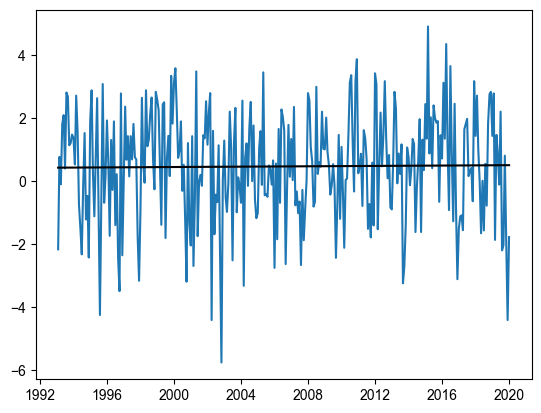

In [6]:
plt.plot(TIME,Esig9317)
plt.plot(TIME,A[0]*np.arange(len(Esig9317))+A[1],color='k',zorder=10)
print(A[0])
